In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [2]:
df_interest = pd.read_csv("processed_interest_data.csv")
df_interest

,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,...,English,Extra,Semester,Last,Overall,Track,Extra_flag,Attendance_flag,cluster,Interest_in_IT
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,...,3,Yes,6th,3.220,3.350,ABM,1,1,1,False
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,...,3,Yes,7th,3.467,3.467,ABM,1,1,1,False
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,...,4,Yes,3rd,4.000,3.720,ABM,1,1,1,False
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,...,5,Yes,4th,3.800,3.750,ABM,1,1,1,False
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,...,3,Yes,4th,3.940,3.940,ABM,1,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Public Health,Male,3.50,4.00,"Lower middle (15,000-30,000)",Village,2,More than 3 Hours,2-3 Hours,40%-59%,...,2,Yes,7th,3.250,3.100,STEM,1,0,0,False
489,Public Health,Male,4.50,4.00,"Upper middle (30,000-50,000)",City,4,2-3 Hours,2-3 Hours,60%-79%,...,3,Yes,9th,3.500,3.670,STEM,1,0,0,False
490,Sociology,Female,4.56,3.67,"Lower middle (15,000-30,000)",City,3,0-1 Hour,2-3 Hours,40%-59%,...,2,No,2nd,3.560,3.560,HUMSS,0,0,0,False
491,Sociology,Male,4.23,4.50,"Low (Below 15,000)",Village,3,More than 3 Hours,2-3 Hours,80%-100%,...,3,Yes,10th,3.610,3.750,HUMSS,1,1,1,False


In [3]:
df_perf = pd.read_csv("processed_clusters.csv")
# df_perf

In [4]:
df_interest['performance_group'] = np.random.choice(['High', 'Average', 'Low'], len(df_interest))

print(df_interest.head())

                Department  Gender   HSC   SSC                        Income  \
0  Business Administration    Male  4.17  4.84            Low (Below 15,000)   
1  Business Administration  Female  4.92  5.00  Upper middle (30,000-50,000)   
2  Business Administration    Male  5.00  4.83  Lower middle (15,000-30,000)   
3  Business Administration    Male  4.00  4.50           High (Above 50,000)   
4  Business Administration  Female  2.19  3.17  Lower middle (15,000-30,000)   

  Hometown  Computer        Preparation             Gaming Attendance  ...  \
0  Village         3  More than 3 Hours           0-1 Hour   80%-100%  ...   
1     City         3           0-1 Hour           0-1 Hour   80%-100%  ...   
2  Village         3           0-1 Hour  More than 3 Hours   80%-100%  ...   
3     City         5  More than 3 Hours  More than 3 Hours   80%-100%  ...   
4  Village         3           0-1 Hour          2-3 Hours   80%-100%  ...   

  Extra  Semester   Last Overall  Track  Extra_fla

In [7]:
le_perf = LabelEncoder()
le_track = LabelEncoder()

df_interest['performance_encoded'] = le_perf.fit_transform(df_interest['performance_group'])
df_interest['track_encoded'] = le_track.fit_transform(df_interest['Track'])
df_interest['cluster'].unique()

array([1, 0, 2, 3])

In [8]:
X = df_interest[['Interest_in_IT', 'performance_encoded']]
y = df_interest['track_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


In [9]:
new_student = pd.DataFrame({
    'Interest_in_IT': [0.8],
    'performance_encoded': [le_perf.transform(['Low'])[0]]
})

predicted_track = le_track.inverse_transform(model.predict(new_student))
print("Predicted Track:", predicted_track[0])


Predicted Track: STEM


In [10]:
print(df_interest['Track'].value_counts())
print(df_interest['Track'].unique())


Track
STEM     446
HUMSS     38
ABM        9
Name: count, dtype: int64
['ABM' 'STEM' 'HUMSS']


In [24]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.94


In [ ]:
cm = confusion_matrix(y_test, y_pred)


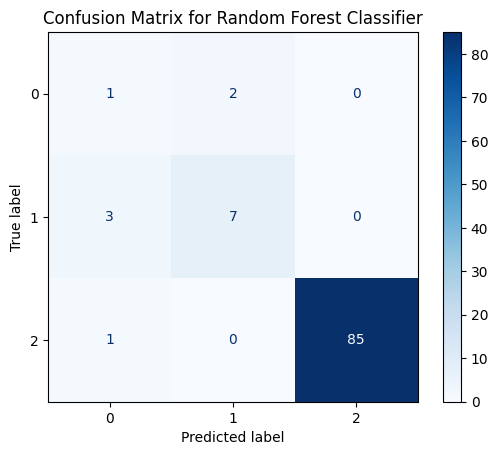

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()